# Import lib

In [1]:
import pandas as pd
import numpy as np
from warnings import filterwarnings
filterwarnings("ignore")
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV

In [2]:
loan=pd.read_csv("df.csv")
loan.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,initial_list_status,out_prncp,total_rec_late_fee,recoveries,last_pymnt_d,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_24m,all_util,inq_fi,total_cu_tl,inq_last_12m,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mort_acc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_il_tl,num_tl_120dpd_2m,num_tl_90g_dpd_24m,pct_tl_nvr_dlq,pub_rec_bankruptcies,hardship_flag,debt_settlement_flag
0,100.000000,60,4.419276,D,4.0,OWN,228.035085,Source Verified,2016-03-01,Fully Paid,n,other,GA,3.872983,0.0,1.0,4.0,2.0,35.9,w,0.000000,0.0,0.0,03-2016,0.0,Individual,0.0,622.0,126.039676,2.0,1.0,5.0,2.0,14809.0,99.0,0.0,88.0,3.0,0.0,2.0,40.286474,39.900000,0.0,0.0,0.0,4.0,2.0,2.0,7.0,0.0,0.0,83.3,0.0,N,N
1,187.082869,60,4.555217,E,3.0,MORTGAGE,291.547595,Source Verified,2016-03-01,Fully Paid,n,debt_consolidation,NY,4.998000,0.0,1.0,9.0,0.0,46.6,w,0.000000,0.0,0.0,03-2016,0.0,Individual,0.0,0.0,402.048505,0.0,3.0,3.0,14.0,73863.0,83.0,1.0,71.0,5.0,1.0,2.0,69.519781,67.800000,0.0,0.0,1.0,5.0,0.0,3.0,9.0,0.0,0.0,100.0,0.0,N,N
2,141.421356,60,3.026549,B,1.0,MORTGAGE,277.488739,Not Verified,2016-03-01,Current,n,home_improvement,IL,3.708099,0.0,1.0,14.0,0.0,13.9,w,117.048751,0.0,0.0,03-2016,0.0,Individual,0.0,0.0,158.211883,0.0,8.0,0.0,46.0,20827.0,38.0,3.0,30.0,1.0,0.0,2.0,146.598090,3.600000,0.0,0.0,0.0,3.0,0.0,2.0,9.0,0.0,0.0,100.0,0.0,N,N
3,132.193041,60,3.386739,B,6.0,MORTGAGE,204.161701,Verified,2016-03-01,Current,n,debt_consolidation,TX,5.482700,0.0,0.0,10.0,0.0,27.6,w,110.404846,0.0,0.0,03-2016,0.0,Individual,0.0,0.0,344.075573,0.0,0.0,0.0,37.0,0.0,74.0,1.0,28.0,0.0,0.0,0.0,130.659864,20.400000,0.0,0.0,1.0,5.0,0.0,5.0,4.0,0.0,0.0,100.0,0.0,N,N
4,89.442719,36,3.026549,B,10.0,RENT,268.328157,Source Verified,2016-03-01,Current,n,debt_consolidation,MD,4.757100,0.0,0.0,4.0,0.0,98.7,w,58.081408,0.0,0.0,03-2016,0.0,Individual,0.0,0.0,244.065565,0.0,3.0,3.0,9.0,39833.0,75.0,0.0,81.0,2.0,6.0,1.0,104.198771,59.762205,0.0,0.0,0.0,9.0,0.0,0.0,8.0,0.0,0.0,100.0,0.0,N,N


In [3]:
loan.dtypes

loan_amnt                     float64
term                            int64
int_rate                      float64
grade                          object
emp_length                    float64
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
purpose                        object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
inq_last_6mths                float64
open_acc                      float64
pub_rec                       float64
revol_util                    float64
initial_list_status            object
out_prncp                     float64
total_rec_late_fee            float64
recoveries                    float64
last_pymnt_d                   object
collections_12_mths_ex_med    float64
application_type               object
acc_now_deli

# Convert into category datatype 

In [4]:
loan[["term","grade","emp_length","home_ownership","verification_status","loan_status","pymnt_plan","purpose","addr_state","initial_list_status","application_type","acc_now_delinq","hardship_flag","debt_settlement_flag"]]=loan[["term","grade","emp_length","home_ownership","verification_status","loan_status","pymnt_plan","purpose","addr_state","initial_list_status","application_type","acc_now_delinq","hardship_flag","debt_settlement_flag"]].astype("category")

In [5]:
loan_copy=loan

# Encoding 

In [6]:
loan=pd.get_dummies(loan,columns=["home_ownership","verification_status","issue_d","pymnt_plan","purpose","addr_state","initial_list_status","last_pymnt_d","application_type","hardship_flag","debt_settlement_flag"],drop_first=True)
loan.head()

,loan_amnt,term,int_rate,grade,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_24m,all_util,inq_fi,total_cu_tl,inq_last_12m,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mort_acc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_il_tl,num_tl_120dpd_2m,num_tl_90g_dpd_24m,pct_tl_nvr_dlq,pub_rec_bankruptcies,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,issue_d_2016-02-01,issue_d_2016-03-01,pymnt_plan_y,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w,last_pymnt_d_01-2016,last_pymnt_d_02-2016,last_pymnt_d_03-2016,application_type_Joint App,hardship_flag_Y,debt_settlement_flag_Y
0,100.000000,60,4.419276,D,4.0,228.035085,Fully Paid,3.872983,0.0,1.0,4.0,2.0,35.9,0.000000,0.0,0.0,0.0,0.0,622.0,126.039676,2.0,1.0,5.0,2.0,14809.0,99.0,0.0,88.0,3.0,0.0,2.0,40.286474,39.900000,0.0,0.0,0.0,4.0,2.0,2.0,7.0,0.0,0.0,83.3,0.0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1,187.082869,60,4.555217,E,3.0,291.547595,Fully Paid,4.998000,0.0,1.0,9.0,0.0,46.6,0.000000,0.0,0.0,0.0,0.0,0.0,402.048505,0.0,3.0,3.0,14.0,73863.0,83.0,1.0,71.0,5.0,1.0,2.0,69.519781,67.800000,0.0,0.0,1.0,5.0,0.0,3.0,9.0,0.0,0.0,100.0,0.0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
2,141.421356,60,3.026549,B,1.0,277.488739,Current,3.708099,0.0,1.0,14.0,0.0,13.9,117.048751,0.0,0.0,0.0,0.0,0.0,158.211883,0.0,8.0,0.0,46.0,20827.0,38.0,3.0,30.0,1.0,0.0,2.0,146.598090,3.600000,0.0,0.0,0.0,3.0,0.0,2.0,9.0,0.0,0.0,100.0,0.0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,132.193041,60,3.386739,B,6.0,204.161701,Current,5.482700,0.0,0.0,10.0,0.0,27.6,110.404846,0.0,0.0,0.0,0.0,0.0,344.075573,0.0,0.0,0.0,37.0,0.0,74.0,1.0,28.0,0.0,0.0,0.0,130.659864,20.400000,0.0,0.0,1.0,5.0,0.0,5.0,4.0,0.0,0.0,100.0,0.0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,89.442719,36,3.026549,B,10.0,268.328157,Current,4.757100,0.0,0.0,4.0,0.0,98.7,58.081408,0.0,0.0,0.0,0.0,0.0,244.065565,0.0,3.0,3.0,9.0,39833.0,75.0,0.0,81.0,2.0,6.0,1.0,104.198771,59.762205,0.0,0.0,0.0,9.0,0.0,0.0,8.0,0.0,0.0,100.0,0.0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


In [7]:
loan.dtypes

loan_amnt                               float64
term                                   category
int_rate                                float64
grade                                  category
emp_length                             category
annual_inc                              float64
loan_status                            category
dti                                     float64
delinq_2yrs                             float64
inq_last_6mths                          float64
open_acc                                float64
pub_rec                                 float64
revol_util                              float64
out_prncp                               float64
total_rec_late_fee                      float64
recoveries                              float64
collections_12_mths_ex_med              float64
acc_now_delinq                         category
tot_coll_amt                            float64
tot_cur_bal                             float64
open_acc_6m                             

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
loan["grade"]=le.fit_transform(loan["grade"])
loan.head()

,loan_amnt,term,int_rate,grade,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_24m,all_util,inq_fi,total_cu_tl,inq_last_12m,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mort_acc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_il_tl,num_tl_120dpd_2m,num_tl_90g_dpd_24m,pct_tl_nvr_dlq,pub_rec_bankruptcies,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,issue_d_2016-02-01,issue_d_2016-03-01,pymnt_plan_y,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w,last_pymnt_d_01-2016,last_pymnt_d_02-2016,last_pymnt_d_03-2016,application_type_Joint App,hardship_flag_Y,debt_settlement_flag_Y
0,100.000000,60,4.419276,3,4.0,228.035085,Fully Paid,3.872983,0.0,1.0,4.0,2.0,35.9,0.000000,0.0,0.0,0.0,0.0,622.0,126.039676,2.0,1.0,5.0,2.0,14809.0,99.0,0.0,88.0,3.0,0.0,2.0,40.286474,39.900000,0.0,0.0,0.0,4.0,2.0,2.0,7.0,0.0,0.0,83.3,0.0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1,187.082869,60,4.555217,4,3.0,291.547595,Fully Paid,4.998000,0.0,1.0,9.0,0.0,46.6,0.000000,0.0,0.0,0.0,0.0,0.0,402.048505,0.0,3.0,3.0,14.0,73863.0,83.0,1.0,71.0,5.0,1.0,2.0,69.519781,67.800000,0.0,0.0,1.0,5.0,0.0,3.0,9.0,0.0,0.0,100.0,0.0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
2,141.421356,60,3.026549,1,1.0,277.488739,Current,3.708099,0.0,1.0,14.0,0.0,13.9,117.048751,0.0,0.0,0.0,0.0,0.0,158.211883,0.0,8.0,0.0,46.0,20827.0,38.0,3.0,30.0,1.0,0.0,2.0,146.598090,3.600000,0.0,0.0,0.0,3.0,0.0,2.0,9.0,0.0,0.0,100.0,0.0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,132.193041,60,3.386739,1,6.0,204.161701,Current,5.482700,0.0,0.0,10.0,0.0,27.6,110.404846,0.0,0.0,0.0,0.0,0.0,344.075573,0.0,0.0,0.0,37.0,0.0,74.0,1.0,28.0,0.0,0.0,0.0,130.659864,20.400000,0.0,0.0,1.0,5.0,0.0,5.0,4.0,0.0,0.0,100.0,0.0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,89.442719,36,3.026549,1,10.0,268.328157,Current,4.757100,0.0,0.0,4.0,0.0,98.7,58.081408,0.0,0.0,0.0,0.0,0.0,244.065565,0.0,3.0,3.0,9.0,39833.0,75.0,0.0,81.0,2.0,6.0,1.0,104.198771,59.762205,0.0,0.0,0.0,9.0,0.0,0.0,8.0,0.0,0.0,100.0,0.0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


In [9]:
loan['loan_status'].replace(['Fully Paid', 'Current','In Grace Period','Late (16-30 days)','Default','Late (31-120 days)','Charged Off'], [0,0,0,1,1,1,1], inplace=True)

# Feature selection

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_main=loan.loc[:, loan.columns!="loan_status"]
y_main = loan.loc[:, loan.columns == 'loan_status']

In [12]:
X_main.describe()

,loan_amnt,int_rate,grade,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_24m,all_util,inq_fi,total_cu_tl,inq_last_12m,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mort_acc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_il_tl,num_tl_120dpd_2m,num_tl_90g_dpd_24m,pct_tl_nvr_dlq,pub_rec_bankruptcies,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,issue_d_2016-02-01,issue_d_2016-03-01,pymnt_plan_y,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w,last_pymnt_d_01-2016,last_pymnt_d_02-2016,last_pymnt_d_03-2016,application_type_Joint App,hardship_flag_Y,debt_settlement_flag_Y
count,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,1.338890e+05,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.00000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000
mean,119.480591,3.467828,1.673513,271.876341,4.279049,0.343476,0.576498,12.119922,0.238705,51.929074,47.516755,1.362711e+00,108.131101,0.021256,259.246596,334.267599,1.045373,2.797147,1.625215,21.641175,35704.147819,71.176280,2.930006,60.654499,0.952476,1.543383,2.186169,85.338706,59.762205,0.010120,21.343172,1.671377,6.625765,0.518900,3.809477,8.703277,0.000911,0.090612,94.061616,0.130474,0.120951,0.379897,0.376633,0.271583,0.295237,0.463025,0.000710,0.240401,0.572780,0.064695,0.004071,0.021832,0.010882,0.005744,0.053268,0.00062,0.010404,0.005549,0.012085,0.007491,0.023632,0.136927,0.020442,0.014885,0.002136,0.002890,0.070469,0.032221,0.004788,0.002532,

In [13]:
feature=X_main[["loan_amnt","int_rate","annual_inc","dti","delinq_2yrs","open_acc","pub_rec","bc_open_to_buy","bc_util","revol_util","out_prncp","total_rec_late_fee","recoveries","tot_cur_bal","tot_coll_amt","total_bal_il","delinq_amnt"]]

In [14]:
feature_scale=list(feature.columns)

In [15]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_main[feature_scale]=ss.fit_transform(feature)

In [16]:
X_main.head()

,loan_amnt,term,int_rate,grade,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_24m,all_util,inq_fi,total_cu_tl,inq_last_12m,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mort_acc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_il_tl,num_tl_120dpd_2m,num_tl_90g_dpd_24m,pct_tl_nvr_dlq,pub_rec_bankruptcies,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,issue_d_2016-02-01,issue_d_2016-03-01,pymnt_plan_y,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w,last_pymnt_d_01-2016,last_pymnt_d_02-2016,last_pymnt_d_03-2016,application_type_Joint App,hardship_flag_Y,debt_settlement_flag_Y
0,-0.537453,60,1.417657,3,4.0,-0.541819,-0.365133,-0.37804,1.0,-1.409115,2.650312,-0.662302,-0.994238,-0.133718,-0.181158,0.0,0.0,0.176770,-1.105081,2.0,1.0,5.0,2.0,-0.495642,99.0,0.0,88.0,3.0,0.0,2.0,-0.753524,-7.124747e-01,0.0,-0.023319,0.0,4.0,2.0,2.0,7.0,0.0,0.0,83.3,0.0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1,1.865089,60,1.620208,4,3.0,0.243110,0.646477,-0.37804,1.0,-0.541425,-0.359192,-0.220191,-0.994238,-0.133718,-0.181158,0.0,0.0,-0.126331,0.359718,0.0,3.0,3.0,14.0,0.905144,83.0,1.0,71.0,5.0,1.0,2.0,-0.264580,2.883228e-01,0.0,-0.023319,1.0,5.0,0.0,3.0,9.0,0.0,0.0,100.0,0.0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
2,0.605327,60,-0.657506,1,1.0,0.069362,-0.513396,-0.37804,1.0,0.326265,-0.359192,-1.571315,1.454884,-0.133718,-0.181158,0.0,0.0,-0.126331,-0.934341,0.0,8.0,0.0,46.0,-0.352892,38.0,3.0,30.0,1.0,0.0,2.0,1.024598,-2.014587e+00,0.0,-0.023319,0.0,3.0,0.0,2.0,9.0,0.0,0.0,100.0,0.0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,0.350726,60,-0.120823,1,6.0,-0.836862,1.082318,-0.37804,0.0,-0.367887,-0.359192,-1.005248,1.315867,-0.133718,-0.181158,0.0,0.0,-0.126331,0.052052,0.0,0.0,0.0,37.0,-0.846918,74.0,1.0,28.0,0.0,0.0,0.0,0.758022,-1.411957e+00,0.0,-0.023319,1.0,5.0,0.0,5.0,4.0,0.0,0.0,100.0,0.0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,-0.828719,36,-0.657506,1,10.0,-0.043851,0.429861,-0.37804,0.0,-1.409115,-0.359192,1.932518,0.221054,-0.133718,-0.181158,0.0,0.0,-0.126331,-0.478709,0.0,3.0,3.0,9.0,0.097938,75.0,0.0,81.0,2.0,6.0,1.0,0.315445,-6.371947e-15,0.0,-0.023319,0.0,9.0,0.0,0.0,8.0,0.0,0.0,100.0,0.0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


# Balancing dataset

In [17]:
loan["loan_status"].value_counts(normalize=True)

0    0.86208
1    0.13792
Name: loan_status, dtype: float64

In [18]:
#It is highly imblance data

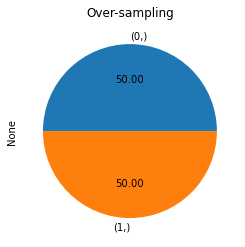

In [19]:
from imblearn.over_sampling import RandomOverSampler
#ros = RandomOverSampler(sampling_strategy="not majority") # string
ros = RandomOverSampler(sampling_strategy=1) # float
X_res, y_res = ros.fit_resample(X_main, y_main)
ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [20]:
#resample all classes but the majority class

# Split data

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train_1,X_test_1,y_train_1,y_test_1=train_test_split(X_res,y_res,test_size=0.3,random_state=1)

# Model 1 (Logistic Regression using all feature)

In [23]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

In [27]:
model = LogisticRegression(max_iter=2000,random_state=1)

model.fit(X_train_1,y_train_1)

LogisticRegression(max_iter=2000, random_state=1)

In [28]:
y_pred_train = model.predict(X_train_1)
y_pred_test = model.predict(X_test_1)

In [29]:
Train_score = model.score(X_train_1,y_train_1)
Test_score = model.score(X_test_1,y_test_1)

In [30]:
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import mean_squared_error

In [31]:
Accuracy_score=metrics.accuracy_score(y_test_1,y_pred_test)
cohen_kappa_score=metrics.cohen_kappa_score(y_pred_test,y_test_1)
AUC_score=round(metrics.roc_auc_score(y_test_1, y_pred_test),4)

In [32]:
score_card = pd.DataFrame(columns=['Model_Name','Train_score','Test_score', 'AUC_Score', 'Cohen_kappa_Score', 'Accuracy'])

# print the score card
score_card

,Model_Name,Train_score,Test_score,AUC_Score,Cohen_kappa_Score,Accuracy


In [33]:
Classification_model = pd.Series({
                     'Model_Name': "Logistic Regression(all feature)",
                        'Train_score':Train_score,
                        'Test_score':Test_score,
                     'AUC_Score':AUC_score,
                     'Cohen_kappa_Score': cohen_kappa_score,
                     'Accuracy': Accuracy_score
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(Classification_model, ignore_index=True)

# print the result table
score_card

,Model_Name,Train_score,Test_score,AUC_Score,Cohen_kappa_Score,Accuracy
0,Logistic Regression(all feature),0.811303,0.812155,0.8119,0.624093,0.812155


# Model 2: Logistic Regression with RFE method for Feature Selection

In [34]:
from sklearn.feature_selection import RFE

In [35]:
logreg_rfe = LogisticRegression(random_state=123)

rfe_model = RFE(estimator=logreg_rfe, n_features_to_select =15)

rfe_model = rfe_model.fit(X_train_1, y_train_1)

feat_index = pd.Series(data = rfe_model.ranking_, index = X_train_1.columns)

signi_feat_rfe = feat_index[feat_index==1].index

print(signi_feat_rfe)

Index(['int_rate', 'out_prncp', 'total_rec_late_fee', 'recoveries',
       'num_tl_120dpd_2m', 'pymnt_plan_y', 'addr_state_DC', 'addr_state_HI',
       'addr_state_MS', 'addr_state_ND', 'addr_state_NE', 'addr_state_SD',
       'addr_state_WV', 'hardship_flag_Y', 'debt_settlement_flag_Y'],
      dtype='object')


In [36]:
logreg_rfe.fit(X_train_1[signi_feat_rfe], y_train_1)

y_pred_train = logreg_rfe.predict(X_train_1[signi_feat_rfe])
y_pred_test = logreg_rfe.predict(X_test_1[signi_feat_rfe])

In [37]:
Train_score = logreg_rfe.score(X_train_1[signi_feat_rfe],y_train_1)
Test_score = logreg_rfe.score(X_test_1[signi_feat_rfe],y_test_1)

In [38]:
Accuracy_score=metrics.accuracy_score(y_test_1,y_pred_test)
cohen_kappa_score=metrics.cohen_kappa_score(y_pred_test,y_test_1)
AUC_score=round(metrics.roc_auc_score(y_test_1, y_pred_test),4)

In [39]:
Classification_model = pd.Series({
                     'Model_Name': "Logistic Regression(Feature selected by RFE method)",
                        'Train_score':Train_score,
                        'Test_score':Test_score,
                     'AUC_Score':AUC_score,
                     'Cohen_kappa_Score': cohen_kappa_score,
                     'Accuracy': Accuracy_score
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(Classification_model, ignore_index=True)

# print the result table
score_card

,Model_Name,Train_score,Test_score,AUC_Score,Cohen_kappa_Score,Accuracy
0,Logistic Regression(all feature),0.811303,0.812155,0.8119,0.624093,0.812155
1,Logistic Regression(Feature selected by RFE me...,0.797286,0.799116,0.7988,0.597949,0.799116


# Model 3: Decision Tree Classifier with all feature

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
dt_full=DecisionTreeClassifier(random_state=10)
dt_full=dt_full.fit(X_train_1,y_train_1)
# prediction
y_pred_1=dt_full.predict(X_test_1)

In [42]:
print("Accuracy : ",metrics.accuracy_score(y_test_1,y_pred_1))

Accuracy :  0.9510064400612239


In [43]:
print("Train_score :",dt_full.score(X_train_1,y_train_1))
print("Test_score :",dt_full.score(X_test_1,y_test_1))

Train_score : 1.0
Test_score : 0.9510064400612239


In [44]:
#Over Fitt model 

In [45]:
Accuracy_score=metrics.accuracy_score(y_test_1,y_pred_1)
Train_score=dt_full.score(X_train_1,y_train_1)
Test_score=dt_full.score(X_test_1,y_test_1)
cohen_kappa_score=metrics.cohen_kappa_score(y_pred_1,y_test_1)
AUC_score=round(metrics.roc_auc_score(y_test_1, y_pred_1),4)

In [46]:
Classification_model = pd.Series({
                     'Model_Name': "Decision Tree (All features)",
                    'Train_score':Train_score,
                    'Test_score':Test_score,
                     'AUC_Score':AUC_score,
                     'Cohen_kappa_Score': cohen_kappa_score,
                     'Accuracy': Accuracy_score
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(Classification_model, ignore_index=True)

# print the result table
score_card

,Model_Name,Train_score,Test_score,AUC_Score,Cohen_kappa_Score,Accuracy
0,Logistic Regression(all feature),0.811303,0.812155,0.8119,0.624093,0.812155
1,Logistic Regression(Feature selected by RFE me...,0.797286,0.799116,0.7988,0.597949,0.799116
2,Decision Tree (All features),1.0,0.951006,0.9512,0.902049,0.951006


# Model 3: Decision tree with best feature selection

In [47]:
important_feature=pd.DataFrame({"feature ": X_res.columns,
                              "Importance": dt_full.feature_importances_})
important_feature.sort_values(by="Importance",ascending=False)

,feature,Importance
14,recoveries,0.279648
12,out_prncp,0.113237
2,int_rate,0.056781
13,total_rec_late_fee,0.035715
0,loan_amnt,0.031689
18,tot_cur_bal,0.031017
6,dti,0.029070
30,bc_open_to_buy,0.022215
5,annual_inc,0.022044
11,revol_util,0.019237


In [48]:
top_15=important_feature.sort_values(by="Importance",ascending=False).head(15)
top_feature=list(top_15["feature "])

In [49]:
X_best_dt=X_res[top_feature]
X_best_dt.columns

Index(['recoveries', 'out_prncp', 'int_rate', 'total_rec_late_fee',
       'loan_amnt', 'tot_cur_bal', 'dti', 'bc_open_to_buy', 'annual_inc',
       'revol_util', 'total_bal_il', 'bc_util', 'il_util', 'all_util',
       'mths_since_rcnt_il'],
      dtype='object')

In [50]:
X_train_3,X_test_3,y_train_3,y_test_3=train_test_split(X_best_dt,y_res,test_size=0.3,random_state=1)
dt=DecisionTreeClassifier(random_state=0,max_depth=4)
dt=dt.fit(X_train_3,y_train_3)
# prediction
y_pred_3=dt.predict(X_test_3)

# Accuracy score

In [51]:
print("Accuracy : ",metrics.accuracy_score(y_test_3,y_pred_3))

Accuracy :  0.8010512028186098


# Checking Fit

In [52]:
print("Train_score :",dt.score(X_train_3,y_train_3))
print("Test_score :",dt.score(X_test_3,y_test_3))

Train_score : 0.7999591563938809
Test_score : 0.8010512028186098


In [53]:
#better model

In [ ]:
Accuracy_score=metrics.accuracy_score(y_test_1,y_pred_3)
Train_score=dt.score(X_train_3,y_train_1)
Test_score=dt.score(X_test_3,y_test_1)
cohen_kappa_score=metrics.cohen_kappa_score(y_pred_3,y_test_1)
AUC_score=round(metrics.roc_auc_score(y_test_1, y_pred_3),4)

In [54]:
Classification_model = pd.Series({
                     'Model_Name': "Decision Tree (Imp Features)",
                     'Train_score':Train_score,
                    'Test_score':Test_score,
                     'AUC_Score':AUC_score,
                     'Cohen_kappa_Score': cohen_kappa_score,
                     'Accuracy': Accuracy_score
    
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(Classification_model, ignore_index=True)

# print the result table
score_card

,Model_Name,Train_score,Test_score,AUC_Score,Cohen_kappa_Score,Accuracy
0,Logistic Regression(all feature),0.811303,0.812155,0.8119,0.624093,0.812155
1,Logistic Regression(Feature selected by RFE me...,0.797286,0.799116,0.7988,0.597949,0.799116
2,Decision Tree (All features),1.0,0.951006,0.9512,0.902049,0.951006
3,Decision Tree (Imp Features),1.0,0.951006,0.9512,0.902049,0.951006


# Classification Report

In [55]:
from sklearn.metrics import classification_report

In [56]:
print(classification_report(y_test_3,y_pred_3))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81     34775
           1       0.83      0.76      0.79     34479

    accuracy                           0.80     69254
   macro avg       0.80      0.80      0.80     69254
weighted avg       0.80      0.80      0.80     69254



# Confusion Matrix

In [57]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_3,y_pred_3)

array([[29211,  5564],
       [ 8214, 26265]], dtype=int64)

# Random Forest Classifier

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
RF_model = RandomForestClassifier(random_state=1,max_depth=4)
RF_model.fit(X_train_1,y_train_1)
y_test_predict = RF_model.predict(X_test_1)

# Checking Fit of Model

In [60]:
print("Train_score :",RF_model.score(X_train_1,y_train_1))
print("Test_score :",RF_model.score(X_test_1,y_test_1))

Train_score : 0.7982078320708946
Test_score : 0.7980766453923239


In [61]:
print('Test report')
print(classification_report(y_test_1,y_test_predict))

Test report
              precision    recall  f1-score   support

           0       0.78      0.83      0.80     34775
           1       0.81      0.77      0.79     34479

    accuracy                           0.80     69254
   macro avg       0.80      0.80      0.80     69254
weighted avg       0.80      0.80      0.80     69254



In [62]:
Accuracy_score=metrics.accuracy_score(y_test_1,y_test_predict)
Train_score=RF_model.score(X_train_1,y_train_1)
Test_score=RF_model.score(X_test_1,y_test_1)
cohen_kappa_score=metrics.cohen_kappa_score(y_test_predict,y_test_1)
AUC_score=round(metrics.roc_auc_score(y_test_1,y_test_predict),4)

In [63]:
Classification_model = pd.Series({
                     'Model_Name': "Random Forest (All feature)",
                      'Train_score':Train_score,
                     'Test_score':Test_score,
                     'AUC_Score':AUC_score,
                     'Cohen_kappa_Score': cohen_kappa_score,
                     'Accuracy': Accuracy_score
    
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(Classification_model, ignore_index=True)

# print the result table
score_card

,Model_Name,Train_score,Test_score,AUC_Score,Cohen_kappa_Score,Accuracy
0,Logistic Regression(all feature),0.811303,0.812155,0.8119,0.624093,0.812155
1,Logistic Regression(Feature selected by RFE me...,0.797286,0.799116,0.7988,0.597949,0.799116
2,Decision Tree (All features),1.0,0.951006,0.9512,0.902049,0.951006
3,Decision Tree (Imp Features),1.0,0.951006,0.9512,0.902049,0.951006
4,Random Forest (All feature),0.798208,0.798077,0.798,0.596052,0.798077


# Random Forest with Important feature

In [64]:
imp_feat = pd.DataFrame({"Importance":RF_model.feature_importances_,'Feature':X_train_1.columns})
imp_feature = imp_feat.sort_values(by='Importance',ascending=False)[:15]['Feature']

In [65]:
imp=list(imp_feature)

In [66]:
X_train_4=X_train_1[imp]
X_test_4=X_test_1[imp]

In [67]:
RF_model_2 = RandomForestClassifier(random_state=1,max_features='auto').fit(X_train_4,y_train_1)

In [68]:
y_pred_RF2 = RF_model_2.predict(X_test_4)

# Checking Fit 

In [69]:
print("Train_score :",RF_model_2.score(X_train_4,y_train_1))
print("Test_score :",round(RF_model_2.score(X_test_4,y_test_1),3))

Train_score : 1.0
Test_score : 0.986


In [70]:
print('Test report')
print(classification_report(y_test_1,y_pred_RF2))

Test report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     34775
           1       0.98      1.00      0.99     34479

    accuracy                           0.99     69254
   macro avg       0.99      0.99      0.99     69254
weighted avg       0.99      0.99      0.99     69254



In [71]:
Accuracy_score=metrics.accuracy_score(y_test_1,y_pred_RF2)
Train_score=RF_model_2.score(X_train_4,y_train_1)
Test_score=RF_model_2.score(X_test_4,y_test_1)
cohen_kappa_score=metrics.cohen_kappa_score(y_pred_RF2,y_test_1)
AUC_score=round(metrics.roc_auc_score(y_test_1,y_pred_RF2),4)

In [72]:
Classification_model = pd.Series({
                     'Model_Name': "Random Forest (Imp Feature)",
                      'Train_score':Train_score,
                     'Test_score':Test_score,
                     'AUC_Score':AUC_score,
                     'Cohen_kappa_Score': cohen_kappa_score,
                     'Accuracy': Accuracy_score
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(Classification_model, ignore_index=True)

# print the result table
score_card

,Model_Name,Train_score,Test_score,AUC_Score,Cohen_kappa_Score,Accuracy
0,Logistic Regression(all feature),0.811303,0.812155,0.8119,0.624093,0.812155
1,Logistic Regression(Feature selected by RFE me...,0.797286,0.799116,0.7988,0.597949,0.799116
2,Decision Tree (All features),1.0,0.951006,0.9512,0.902049,0.951006
3,Decision Tree (Imp Features),1.0,0.951006,0.9512,0.902049,0.951006
4,Random Forest (All feature),0.798208,0.798077,0.798,0.596052,0.798077
5,Random Forest (Imp Feature),1.0,0.985835,0.9859,0.971671,0.985835


# Random Forest : Grid Search CV for Finding the best perameters for our model

In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:
param=[{"max_depth": [None,3,4,5,6],
       "max_features":['auto', 'sqrt', 'log2']}]
clf=GridSearchCV(RF_model_2,param,cv=10,scoring="accuracy")
clf.fit(X_train_4,y_train_1)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=1),
             param_grid=[{'max_depth': [None, 3, 4, 5, 6],
                          'max_features': ['auto', 'sqrt', 'log2']}],
             scoring='accuracy')

In [75]:
print(clf.best_params_)

{'max_depth': None, 'max_features': 'auto'}


In [76]:
print(clf.best_score_)

0.9818864785985065


In [77]:
model_RF_3=RandomForestClassifier(random_state=40,max_depth=None,max_features="auto").fit(X_train_4,y_train_1)

In [78]:
y_pred_RF3=model_RF_3.predict(X_test_4)
print(classification_report(y_test_1,y_pred_RF3))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     34775
           1       0.98      1.00      0.99     34479

    accuracy                           0.99     69254
   macro avg       0.99      0.99      0.99     69254
weighted avg       0.99      0.99      0.99     69254



# Checking Fit

In [79]:
print("Train_score :",model_RF_3.score(X_train_4,y_train_1))
print("Test_score :",round(model_RF_3.score(X_test_4,y_test_1)))

Train_score : 1.0
Test_score : 1


In [80]:
Accuracy_score=metrics.accuracy_score(y_test_1,y_pred_RF3)
Train_score=model_RF_3.score(X_train_4,y_train_1)
Test_score=model_RF_3.score(X_test_4,y_test_1)
cohen_kappa_score=metrics.cohen_kappa_score(y_pred_RF3,y_test_1)
AUC_score=round(metrics.roc_auc_score(y_test_1,y_pred_RF3),4)

In [81]:
Classification_model = pd.Series({
                     'Model_Name': "Random Forest (Using Grid Search CV)",
                     'Train_score':Train_score,
                     'Test_score':Test_score,
                     'AUC_Score':AUC_score,
                     'Cohen_kappa_Score': cohen_kappa_score,
                     'Accuracy': Accuracy_score
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(Classification_model, ignore_index=True)

# print the result table
score_card

,Model_Name,Train_score,Test_score,AUC_Score,Cohen_kappa_Score,Accuracy
0,Logistic Regression(all feature),0.811303,0.812155,0.8119,0.624093,0.812155
1,Logistic Regression(Feature selected by RFE me...,0.797286,0.799116,0.7988,0.597949,0.799116
2,Decision Tree (All features),1.0,0.951006,0.9512,0.902049,0.951006
3,Decision Tree (Imp Features),1.0,0.951006,0.9512,0.902049,0.951006
4,Random Forest (All feature),0.798208,0.798077,0.798,0.596052,0.798077
5,Random Forest (Imp Feature),1.0,0.985835,0.9859,0.971671,0.985835
6,Random Forest (Using Grid Search CV),1.0,0.985503,0.9855,0.971007,0.985503


# Let's try the Boosting Technique- AdaBoost

In [82]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(random_state=1).fit(X_train_1,y_train_1)

# Checking the Fit

In [83]:
print("Train_score :",ada.score(X_train_1,y_train_1))
print("Test_score :",ada.score(X_test_1,y_test_1))

Train_score : 0.8139140551512452
Test_score : 0.8141912380512317


In [84]:
y_pred_ada=ada.predict(X_test_1)
print(classification_report(y_test_1,y_pred_ada))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82     34775
           1       0.84      0.77      0.80     34479

    accuracy                           0.81     69254
   macro avg       0.82      0.81      0.81     69254
weighted avg       0.82      0.81      0.81     69254



In [85]:
Accuracy_score=metrics.accuracy_score(y_test_1,y_pred_ada)
Train_score=ada.score(X_train_1,y_train_1)
Test_score=ada.score(X_test_1,y_test_1)
cohen_kappa_score=metrics.cohen_kappa_score(y_pred_ada,y_test_1)
AUC_score=round(metrics.roc_auc_score(y_test_1,y_pred_ada),4)

In [86]:
Classification_model = pd.Series({
                     'Model_Name': "Ada Boost (All feature)",
                    'Train_score':Train_score,
                    'Test_score':Test_score,
                     'AUC_Score':AUC_score,
                     'Cohen_kappa_Score': cohen_kappa_score,
                     'Accuracy': Accuracy_score
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(Classification_model, ignore_index=True)

# print the result table
score_card

,Model_Name,Train_score,Test_score,AUC_Score,Cohen_kappa_Score,Accuracy
0,Logistic Regression(all feature),0.811303,0.812155,0.8119,0.624093,0.812155
1,Logistic Regression(Feature selected by RFE me...,0.797286,0.799116,0.7988,0.597949,0.799116
2,Decision Tree (All features),1.0,0.951006,0.9512,0.902049,0.951006
3,Decision Tree (Imp Features),1.0,0.951006,0.9512,0.902049,0.951006
4,Random Forest (All feature),0.798208,0.798077,0.798,0.596052,0.798077
5,Random Forest (Imp Feature),1.0,0.985835,0.9859,0.971671,0.985835
6,Random Forest (Using Grid Search CV),1.0,0.985503,0.9855,0.971007,0.985503
7,Ada Boost (All feature),0.813914,0.814191,0.814,0.628233,0.814191


# AdaBoost Hyperparameters Tune

In [87]:
param_grid = {"n_estimators": [40,50,80,100],
              "learning_rate":[0.01,.1,1]
             }

In [88]:
grid_search = RandomizedSearchCV(estimator=ada, param_distributions=param_grid, n_jobs=1, cv=5, scoring='accuracy')

In [89]:
grid_search.fit(X_train_1,y_train_1)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=1), n_jobs=1,
                   param_distributions={'learning_rate': [0.01, 0.1, 1],
                                        'n_estimators': [40, 50, 80, 100]},
                   scoring='accuracy')

In [90]:
print(grid_search.best_params_)

{'n_estimators': 100, 'learning_rate': 1}


In [91]:
print(grid_search.best_score_)

0.8152445797324956


In [92]:
ada1=AdaBoostClassifier(random_state=1,learning_rate=1,n_estimators=100).fit(X_train_1,y_train_1)

# Checking Fit

In [93]:
print("Train_score :",ada1.score(X_train_1,y_train_1))
print("Test_score :",ada1.score(X_test_1,y_test_1))

Train_score : 0.815529234120501
Test_score : 0.8144078320385826


In [94]:
y_pred_ada1=ada1.predict(X_test_1)
print(classification_report(y_test_1,y_pred_ada1))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82     34775
           1       0.84      0.77      0.81     34479

    accuracy                           0.81     69254
   macro avg       0.82      0.81      0.81     69254
weighted avg       0.82      0.81      0.81     69254



In [95]:
Accuracy_score=metrics.accuracy_score(y_test_1,y_pred_ada1)
Train_score=ada1.score(X_train_1,y_train_1)
Test_score=ada1.score(X_test_1,y_test_1)
cohen_kappa_score=metrics.cohen_kappa_score(y_pred_ada1,y_test_1)
AUC_score=round(metrics.roc_auc_score(y_test_1,y_pred_ada1),4)

In [96]:
Classification_model = pd.Series({
                     'Model_Name': "Ada Boost (All feature using RandomizedSearchCV)",
                    'Train_score':Train_score,
                    'Test_score':Test_score,
                     'AUC_Score':AUC_score,
                     'Cohen_kappa_Score': cohen_kappa_score,
                     'Accuracy': Accuracy_score
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(Classification_model, ignore_index=True)

# print the result table
score_card

,Model_Name,Train_score,Test_score,AUC_Score,Cohen_kappa_Score,Accuracy
0,Logistic Regression(all feature),0.811303,0.812155,0.8119,0.624093,0.812155
1,Logistic Regression(Feature selected by RFE me...,0.797286,0.799116,0.7988,0.597949,0.799116
2,Decision Tree (All features),1.0,0.951006,0.9512,0.902049,0.951006
3,Decision Tree (Imp Features),1.0,0.951006,0.9512,0.902049,0.951006
4,Random Forest (All feature),0.798208,0.798077,0.798,0.596052,0.798077
5,Random Forest (Imp Feature),1.0,0.985835,0.9859,0.971671,0.985835
6,Random Forest (Using Grid Search CV),1.0,0.985503,0.9855,0.971007,0.985503
7,Ada Boost (All feature),0.813914,0.814191,0.814,0.628233,0.814191
8,Ada Boost (All feature using RandomizedSearchCV),0.815529,0.814408,0.8142,0.628674,0.814408


# Feature Selection

In [98]:
X_train_5=X_train_1[signi_feat_rfe]
X_test_5=X_test_1[signi_feat_rfe]

In [99]:
ada2=AdaBoostClassifier(random_state=1).fit(X_train_5,y_train_1)

In [100]:
param_grid = {"n_estimators": [40,50,80,100,120],
              "learning_rate":[0.01,.1,1]
             }
rs_model=RandomizedSearchCV(ada2,param_distributions=param_grid,n_iter=5,scoring='accuracy',n_jobs=-1,cv=5,verbose=3)

In [101]:
rs_model.fit(X_train_5,y_train_1)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=1), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 1],
                                        'n_estimators': [40, 50, 80, 100, 120]},
                   scoring='accuracy', verbose=3)

In [102]:
rs_model.best_params_

{'n_estimators': 40, 'learning_rate': 1}

In [103]:
ada_2=AdaBoostClassifier(random_state=1,n_estimators=50,learning_rate=1).fit(X_train_5,y_train_1)

# Checking Fit

In [104]:
print("Train_score :",ada_2.score(X_train_5,y_train_1))
print("Test_score :",ada_2.score(X_test_5,y_test_1))

Train_score : 0.8064446259715827
Test_score : 0.8065526900973229


In [105]:
y_pred_ada_2=ada_2.predict(X_test_5)
print(classification_report(y_test_1,y_pred_ada_2))

              precision    recall  f1-score   support

           0       0.79      0.85      0.81     34775
           1       0.83      0.77      0.80     34479

    accuracy                           0.81     69254
   macro avg       0.81      0.81      0.81     69254
weighted avg       0.81      0.81      0.81     69254



In [106]:
Accuracy_score=metrics.accuracy_score(y_test_1,y_pred_ada_2)
Train_score=ada_2.score(X_train_5,y_train_1)
Test_score=ada_2.score(X_test_5,y_test_1)
cohen_kappa_score=metrics.cohen_kappa_score(y_pred_ada_2,y_test_1)
AUC_score=round(metrics.roc_auc_score(y_test_1,y_pred_ada_2),4)

In [107]:
Classification_model = pd.Series({
                     'Model_Name': "Ada Boost (RFE) using RandomizedSearchCV",
                    'Train_score':Train_score,
                    'Test_score':Test_score,
                     'AUC_Score':AUC_score,
                     'Cohen_kappa_Score': cohen_kappa_score,
                     'Accuracy': Accuracy_score
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(Classification_model, ignore_index=True)

# print the result table
score_card

,Model_Name,Train_score,Test_score,AUC_Score,Cohen_kappa_Score,Accuracy
0,Logistic Regression(all feature),0.811303,0.812155,0.8119,0.624093,0.812155
1,Logistic Regression(Feature selected by RFE me...,0.797286,0.799116,0.7988,0.597949,0.799116
2,Decision Tree (All features),1.0,0.951006,0.9512,0.902049,0.951006
3,Decision Tree (Imp Features),1.0,0.951006,0.9512,0.902049,0.951006
4,Random Forest (All feature),0.798208,0.798077,0.798,0.596052,0.798077
5,Random Forest (Imp Feature),1.0,0.985835,0.9859,0.971671,0.985835
6,Random Forest (Using Grid Search CV),1.0,0.985503,0.9855,0.971007,0.985503
7,Ada Boost (All feature),0.813914,0.814191,0.814,0.628233,0.814191
8,Ada Boost (All feature using RandomizedSearchCV),0.815529,0.814408,0.8142,0.628674,0.814408
9,Ada Boost (RFE) using RandomizedSearchCV,0.806445,0.806553,0.8064,0.612972,0.806553


# Xgboost with all Numeric features

In [108]:
from xgboost import XGBClassifier

In [111]:
xgb_model = XGBClassifier()
y_pred_xgb = xgb_model.fit(X_train_1._get_numeric_data(), np.ravel(y_train_1, order='C')).predict(X_test_1._get_numeric_data())
print(classification_report(y_test_1, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87     34775
           1       0.88      0.84      0.86     34479

    accuracy                           0.86     69254
   macro avg       0.86      0.86      0.86     69254
weighted avg       0.86      0.86      0.86     69254



In [112]:
print("Train_score :",xgb_model.score(X_train_1._get_numeric_data(),np.ravel(y_train_1, order='C')))
print("Test_score :",xgb_model.score(X_test_1._get_numeric_data(),np.ravel(y_test_1, order='C')))

Train_score : 0.8802787266696371
Test_score : 0.8637335027579635


In [113]:
Accuracy_score=metrics.accuracy_score(y_test_1,y_pred_xgb)
Train_score=xgb_model.score(X_train_1._get_numeric_data(),np.ravel(y_train_1, order='C'))
Test_score=xgb_model.score(X_test_1._get_numeric_data(),np.ravel(y_test_1, order='C'))
cohen_kappa_score=metrics.cohen_kappa_score(y_pred_xgb,y_test_1)
AUC_score=round(metrics.roc_auc_score(y_test_1,y_pred_xgb),4)

In [114]:
Classification_model = pd.Series({
                     'Model_Name': "XGBOOST(All Num Feature)",
                    'Train_score':Train_score,
                    'Test_score':Test_score,
                     'AUC_Score':AUC_score,
                     'Cohen_kappa_Score': cohen_kappa_score,
                     'Accuracy': Accuracy_score
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(Classification_model, ignore_index=True)

# print the result table
score_card

,Model_Name,Train_score,Test_score,AUC_Score,Cohen_kappa_Score,Accuracy
0,Logistic Regression(all feature),0.811303,0.812155,0.8119,0.624093,0.812155
1,Logistic Regression(Feature selected by RFE me...,0.797286,0.799116,0.7988,0.597949,0.799116
2,Decision Tree (All features),1.0,0.951006,0.9512,0.902049,0.951006
3,Decision Tree (Imp Features),1.0,0.951006,0.9512,0.902049,0.951006
4,Random Forest (All feature),0.798208,0.798077,0.798,0.596052,0.798077
5,Random Forest (Imp Feature),1.0,0.985835,0.9859,0.971671,0.985835
6,Random Forest (Using Grid Search CV),1.0,0.985503,0.9855,0.971007,0.985503
7,Ada Boost (All feature),0.813914,0.814191,0.814,0.628233,0.814191
8,Ada Boost (All feature using RandomizedSearchCV),0.815529,0.814408,0.8142,0.628674,0.814408
9,Ada Boost (RFE) using RandomizedSearchCV,0.806445,0.806553,0.8064,0.612972,0.806553


# XGBOOST using RandomizedsearchCV with all Numeric Feature

In [115]:
param_grid = {"n_estimators": [40,50,80,100],
              "learning_rate":[0.01,.1,1],
              "max_depth" : [None,3, 4, 5, 6],
              "min_child_weight" : [ 1, 3, 5, 7 ],
              "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
              "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
              
             }
rs_model=RandomizedSearchCV(xgb_model,param_distributions=param_grid,n_iter=5,scoring='accuracy',n_jobs=-1,cv=5,verbose=3)

In [116]:
rs_model.fit(X_train_1._get_numeric_data(), np.ravel(y_train_1, order='C'))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                         

In [117]:
print(rs_model.best_params_)

{'n_estimators': 50, 'min_child_weight': 5, 'max_depth': 3, 'learning_rate': 1, 'gamma': 0.3, 'colsample_bytree': 0.7}


In [118]:
xgb_model2=XGBClassifier(n_estimators=80,max_depth =6,min_child_weight=3,learning_rate=1,gamma=0.4,colsample_bytree=0.4).fit(X_train_1._get_numeric_data(), np.ravel(y_train_1, order='C'))

In [119]:
y_pred_xgb2=xgb_model2.predict(X_test_1._get_numeric_data())
print(classification_report(y_test_1,y_pred_xgb2))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88     34775
           1       0.88      0.89      0.88     34479

    accuracy                           0.88     69254
   macro avg       0.88      0.88      0.88     69254
weighted avg       0.88      0.88      0.88     69254



In [120]:
print("Train_score :",xgb_model2.score(X_train_1._get_numeric_data(),np.ravel(y_train_1, order='C')))
print("Test_score :",xgb_model2.score(X_test_1._get_numeric_data(),np.ravel(y_test_1, order='C')))

Train_score : 0.9153918510817367
Test_score : 0.8843821295520836


In [121]:
Accuracy_score=metrics.accuracy_score(y_test_1,y_pred_xgb2)
Train_score=xgb_model2.score(X_train_1._get_numeric_data(),np.ravel(y_train_1, order='C'))
Test_score=xgb_model2.score(X_test_1._get_numeric_data(),np.ravel(y_test_1, order='C'))
cohen_kappa_score=metrics.cohen_kappa_score(y_pred_xgb2,y_test_1)
AUC_score=round(metrics.roc_auc_score(y_test_1,y_pred_xgb2),4)

In [122]:
Classification_model = pd.Series({
                     'Model_Name': "XGBOOST(All Num Feature) using randomizedsearchcv",
                    'Train_score':Train_score,
                    'Test_score':Test_score,
                     'AUC_Score':AUC_score,
                     'Cohen_kappa_Score': cohen_kappa_score,
                     'Accuracy': Accuracy_score
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(Classification_model, ignore_index=True)

# print the result table
score_card

,Model_Name,Train_score,Test_score,AUC_Score,Cohen_kappa_Score,Accuracy
0,Logistic Regression(all feature),0.811303,0.812155,0.8119,0.624093,0.812155
1,Logistic Regression(Feature selected by RFE me...,0.797286,0.799116,0.7988,0.597949,0.799116
2,Decision Tree (All features),1.0,0.951006,0.9512,0.902049,0.951006
3,Decision Tree (Imp Features),1.0,0.951006,0.9512,0.902049,0.951006
4,Random Forest (All feature),0.798208,0.798077,0.798,0.596052,0.798077
5,Random Forest (Imp Feature),1.0,0.985835,0.9859,0.971671,0.985835
6,Random Forest (Using Grid Search CV),1.0,0.985503,0.9855,0.971007,0.985503
7,Ada Boost (All feature),0.813914,0.814191,0.814,0.628233,0.814191
8,Ada Boost (All feature using RandomizedSearchCV),0.815529,0.814408,0.8142,0.628674,0.814408
9,Ada Boost (RFE) using RandomizedSearchCV,0.806445,0.806553,0.8064,0.612972,0.806553


# XGBOOST With RFE Using RandomizedSearchCV

In [123]:
X_train_6=X_train_1[signi_feat_rfe]
X_test_6=X_test_1[signi_feat_rfe]

In [124]:
param_grid = {"n_estimators": [40,50,80,100],
              "learning_rate":[0.01,.1,1,1.5,2],
              "max_depth" : [None,3, 4, 5, 6],
              "min_child_weight" : [  5, 7,8,9,10,12,15,18,20 ],
              "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
              "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7,0.8,0.9,1]   
             }
rs_model=RandomizedSearchCV(xgb_model,param_distributions=param_grid,n_iter=5,scoring='accuracy',n_jobs=-1,cv=5,verbose=3)

In [125]:
rs_model.fit(X_train_6._get_numeric_data(), np.ravel(y_train_1, order='C'))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           n_estimators=100, n_jobs=None,
                     

In [126]:
rs_model.best_params_

{'n_estimators': 40,
 'min_child_weight': 5,
 'max_depth': 5,
 'learning_rate': 1,
 'gamma': 0.4,
 'colsample_bytree': 0.9}

In [127]:
xgb_model3=XGBClassifier(n_estimators=100,max_depth =6,min_child_weight=10,learning_rate=1,gamma=0.1,colsample_bytree=0.8).fit(X_train_6._get_numeric_data(), np.ravel(y_train_1, order='C'))

In [128]:
y_pred_xgb3=xgb_model3.predict(X_test_6._get_numeric_data())
print(classification_report(y_test_1,y_pred_xgb3))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82     34775
           1       0.83      0.79      0.81     34479

    accuracy                           0.82     69254
   macro avg       0.82      0.82      0.82     69254
weighted avg       0.82      0.82      0.82     69254



In [129]:
print("Train_score :",xgb_model3.score(X_train_6._get_numeric_data(),np.ravel(y_train_1, order='C')))
print("Test_score :",xgb_model3.score(X_test_6._get_numeric_data(),np.ravel(y_test_1, order='C')))

Train_score : 0.8240878261300064
Test_score : 0.8171657954775176


In [130]:
Accuracy_score=metrics.accuracy_score(y_test_1,y_pred_xgb3)
Train_score=xgb_model3.score(X_train_6._get_numeric_data(),np.ravel(y_train_1, order='C'))
Test_score=xgb_model3.score(X_test_6._get_numeric_data(),np.ravel(y_test_1, order='C'))
cohen_kappa_score=metrics.cohen_kappa_score(y_pred_xgb3,y_test_1)
AUC_score=round(metrics.roc_auc_score(y_test_1,y_pred_xgb3),4)

In [131]:
Classification_model = pd.Series({
                     'Model_Name': "XGBOOST(RFE) using randomizedsearchcv",
                    'Train_score':Train_score,
                    'Test_score':Test_score,
                     'AUC_Score':AUC_score,
                     'Cohen_kappa_Score': cohen_kappa_score,
                     'Accuracy': Accuracy_score
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(Classification_model, ignore_index=True)

# print the result table
score_card

,Model_Name,Train_score,Test_score,AUC_Score,Cohen_kappa_Score,Accuracy
0,Logistic Regression(all feature),0.811303,0.812155,0.8119,0.624093,0.812155
1,Logistic Regression(Feature selected by RFE me...,0.797286,0.799116,0.7988,0.597949,0.799116
2,Decision Tree (All features),1.0,0.951006,0.9512,0.902049,0.951006
3,Decision Tree (Imp Features),1.0,0.951006,0.9512,0.902049,0.951006
4,Random Forest (All feature),0.798208,0.798077,0.798,0.596052,0.798077
5,Random Forest (Imp Feature),1.0,0.985835,0.9859,0.971671,0.985835
6,Random Forest (Using Grid Search CV),1.0,0.985503,0.9855,0.971007,0.985503
7,Ada Boost (All feature),0.813914,0.814191,0.814,0.628233,0.814191
8,Ada Boost (All feature using RandomizedSearchCV),0.815529,0.814408,0.8142,0.628674,0.814408
9,Ada Boost (RFE) using RandomizedSearchCV,0.806445,0.806553,0.8064,0.612972,0.806553


# Summarize

# Score Card

In [132]:
score_card

,Model_Name,Train_score,Test_score,AUC_Score,Cohen_kappa_Score,Accuracy
0,Logistic Regression(all feature),0.811303,0.812155,0.8119,0.624093,0.812155
1,Logistic Regression(Feature selected by RFE me...,0.797286,0.799116,0.7988,0.597949,0.799116
2,Decision Tree (All features),1.0,0.951006,0.9512,0.902049,0.951006
3,Decision Tree (Imp Features),1.0,0.951006,0.9512,0.902049,0.951006
4,Random Forest (All feature),0.798208,0.798077,0.798,0.596052,0.798077
5,Random Forest (Imp Feature),1.0,0.985835,0.9859,0.971671,0.985835
6,Random Forest (Using Grid Search CV),1.0,0.985503,0.9855,0.971007,0.985503
7,Ada Boost (All feature),0.813914,0.814191,0.814,0.628233,0.814191
8,Ada Boost (All feature using RandomizedSearchCV),0.815529,0.814408,0.8142,0.628674,0.814408
9,Ada Boost (RFE) using RandomizedSearchCV,0.806445,0.806553,0.8064,0.612972,0.806553


From the about score card, I can clearly conclude that the random forest with best feature using Grid search CV is the best model for our project.